In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mn # for missing values

In [2]:
# 加载数据
file_path_train = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\KDDTrain+.txt"
file_path_test = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\KDDTest+.txt"
# 定义列名
data_columns = ["duration", "protocol_type", "service", "flag", "src_bytes",
                "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
                "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
                "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
                "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
                "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
                "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
                "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
                "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
                "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label", "difficulty"]
# 加载数据
train_data = pd.read_csv(file_path_train, header=None, names=data_columns)
test_data = pd.read_csv(file_path_test, header=None, names=data_columns)

In [3]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [4]:
test_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [5]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [6]:
train_data.isnull().sum()
test_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

<Axes: >

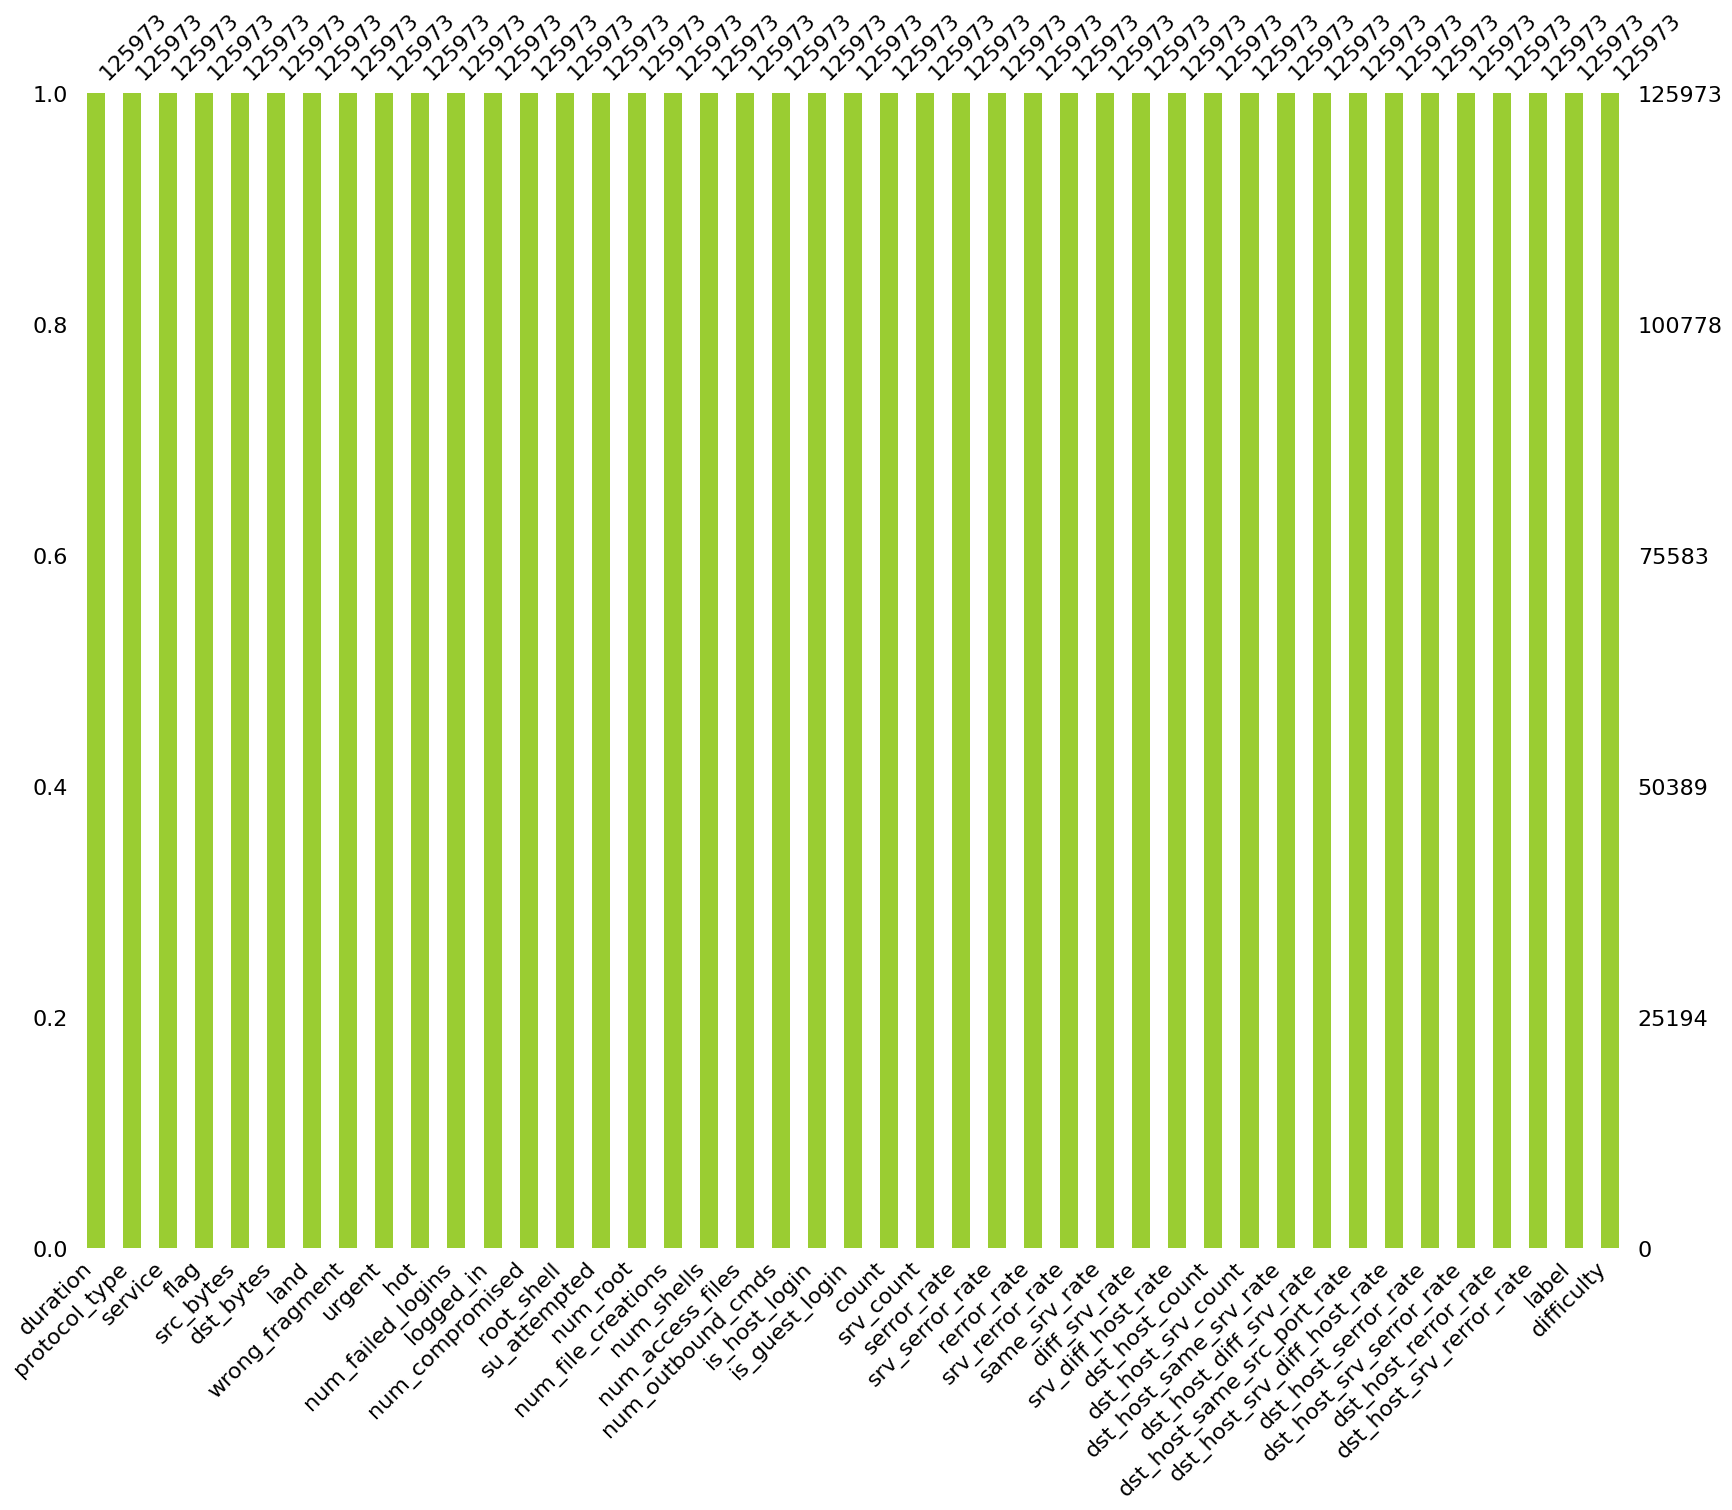

In [7]:
mn.bar(train_data, color='yellowgreen', figsize = (20,15))

<Axes: >

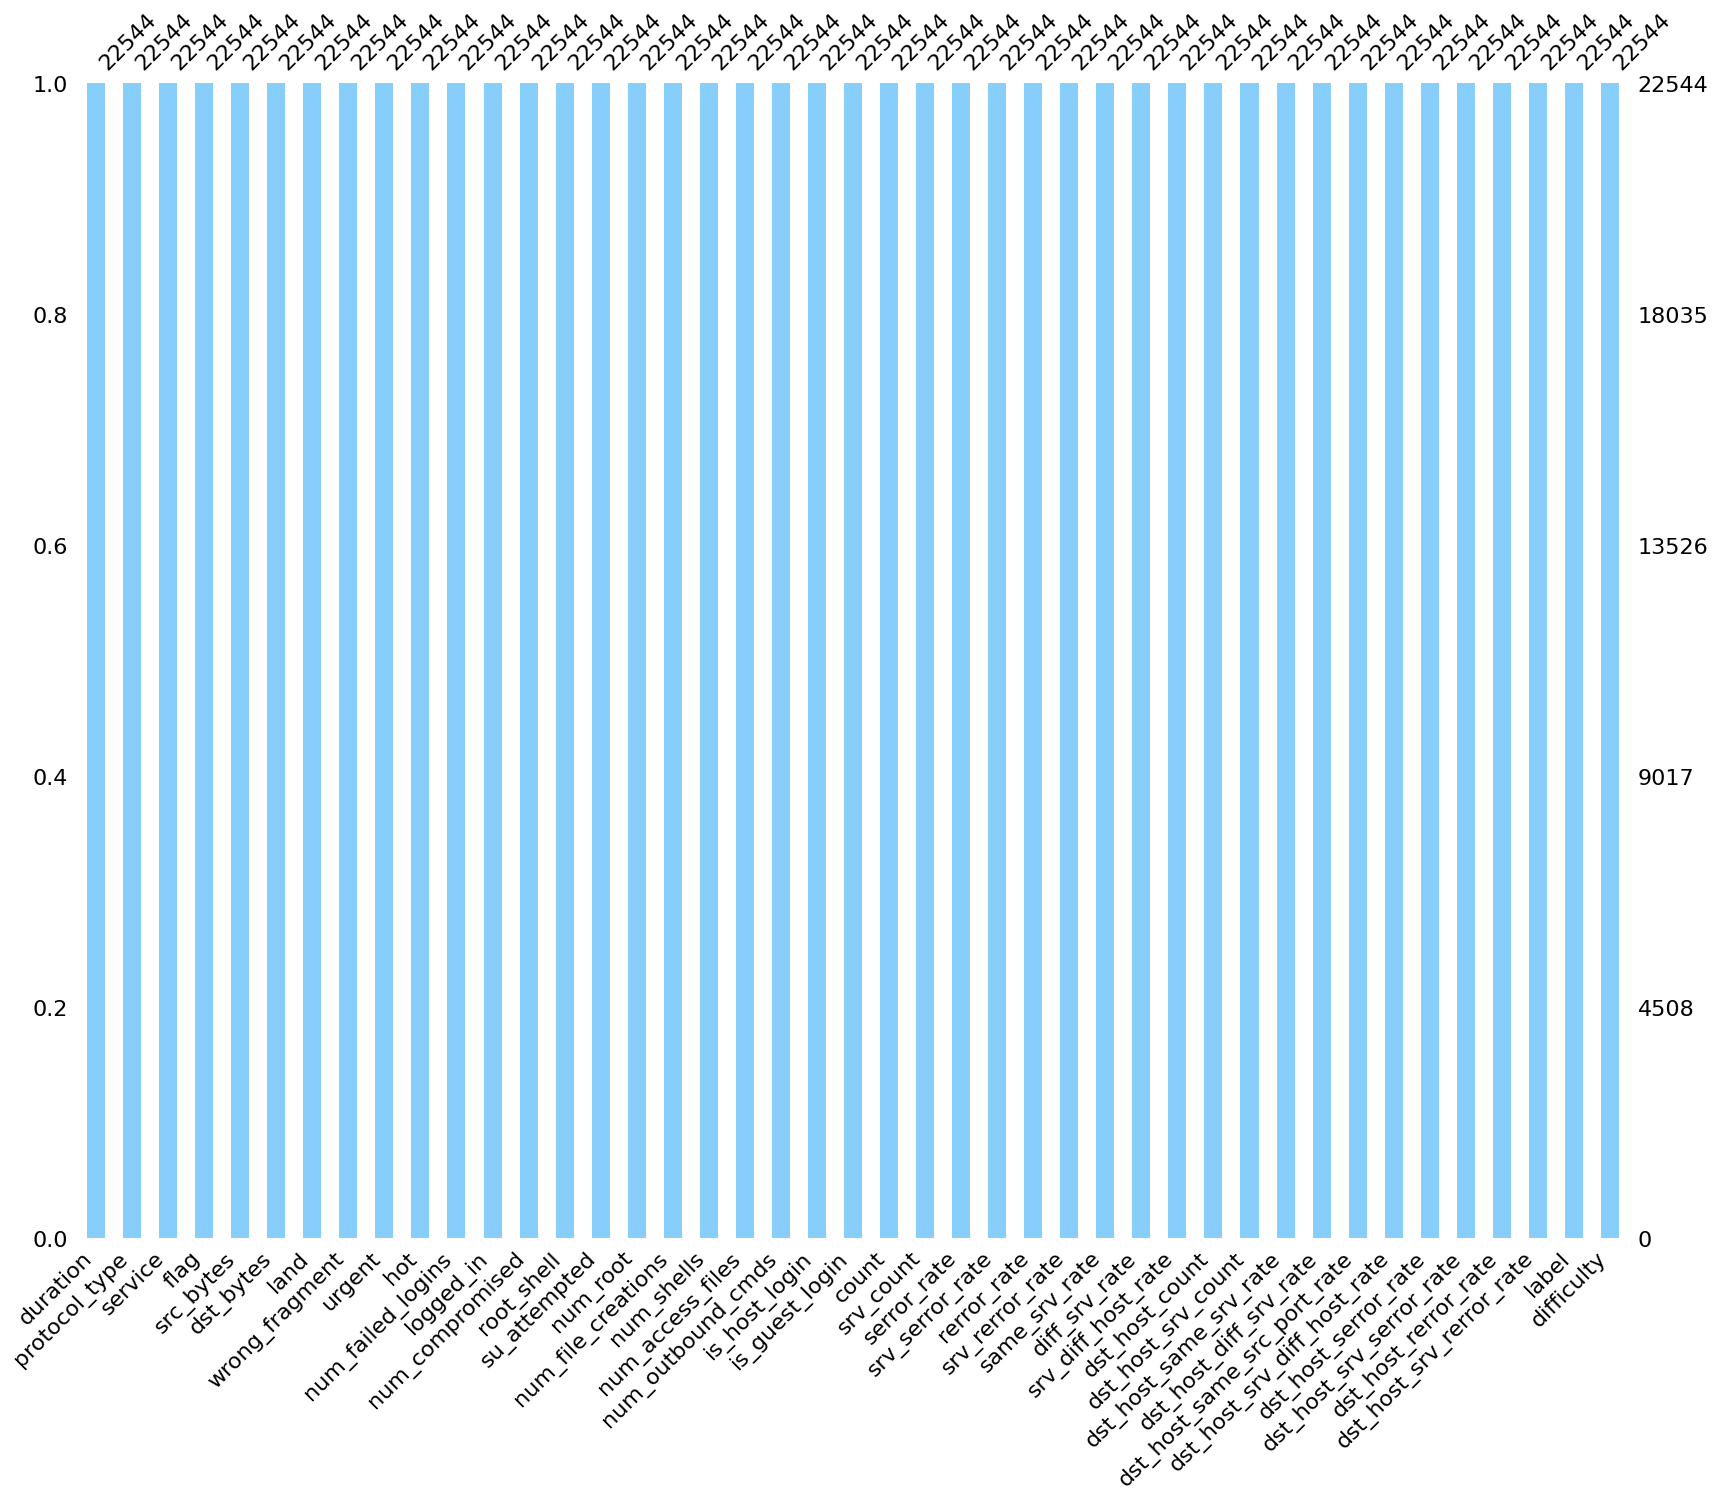

In [8]:
mn.bar(test_data, color = 'lightskyblue', figsize = (20,15))

C:\Users\23076\AppData\Local\Temp\ipykernel_13940\3274896225.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(per_classLabels.index, rotation=45)


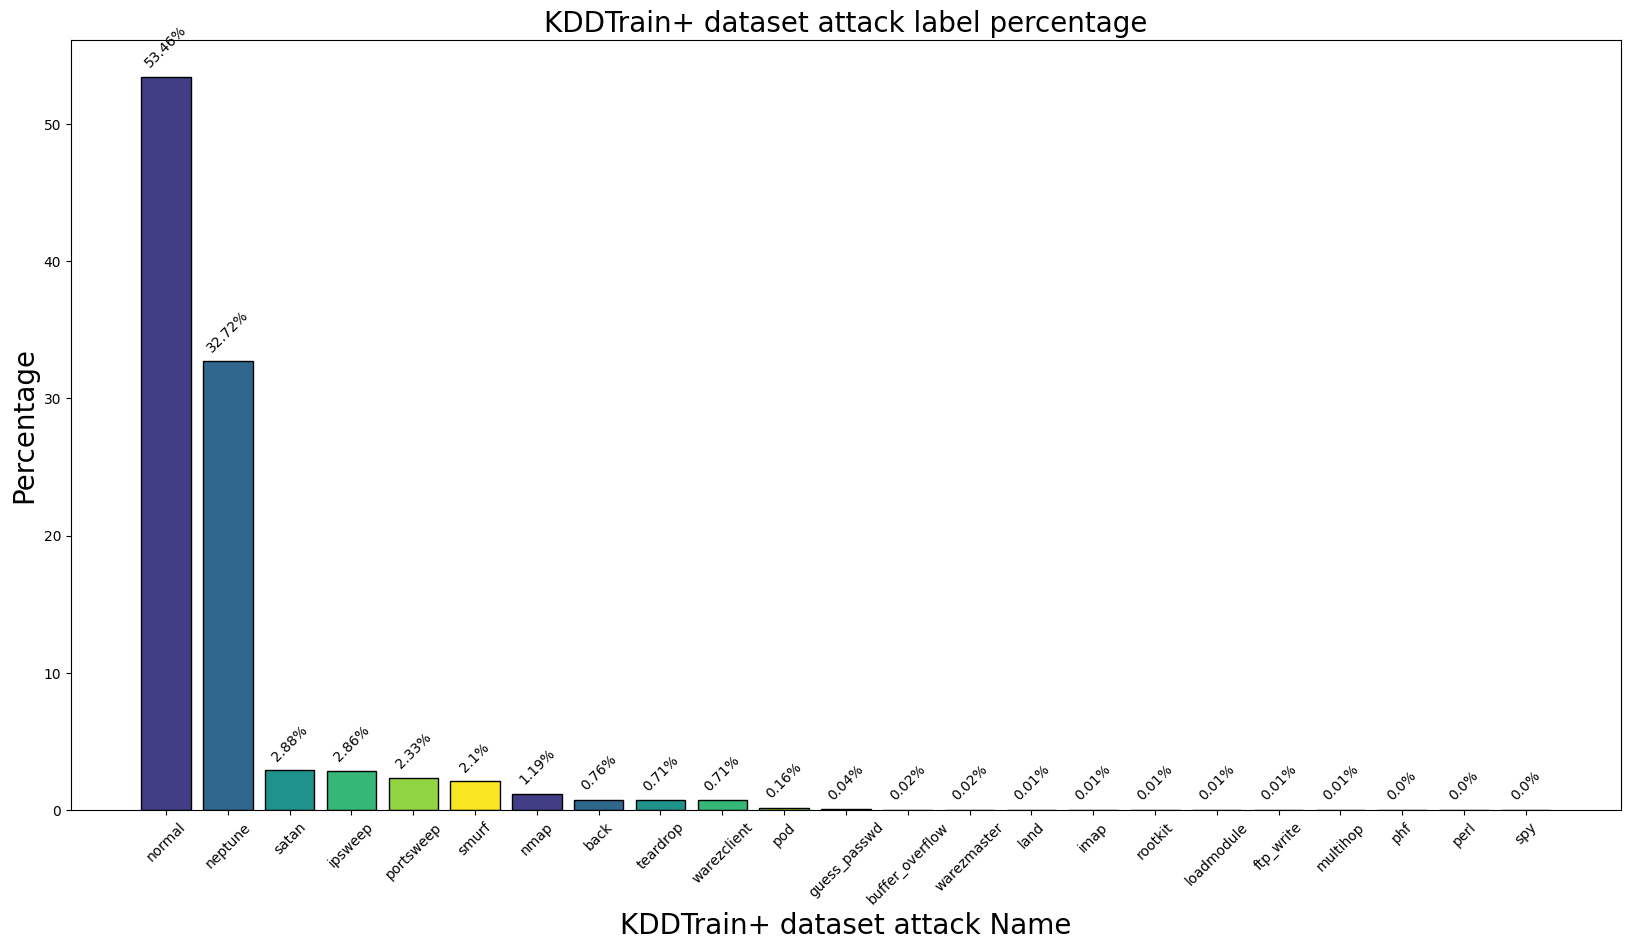

In [9]:
# 按标签分组并计算每个标签的数量
classLabel_counts = train_data.groupby(['label']).size()
# 对标签数量进行降序排序
classLabel_counts_sorted = classLabel_counts.sort_values(ascending=False)
# 计算每个类别标签的百分比
per_classLabels = classLabel_counts_sorted / train_data.shape[0] * 100
# 初始化图形
fig = plt.figure(figsize=(20, 10))
r_ = [round(each, 2) for each in per_classLabels.values]
ax = fig.add_subplot(111)
# 绘制条形图，颜色和边缘颜色已给定
ax.bar(per_classLabels.index, per_classLabels.values, color=['#413E85', '#30688D', '#1F928B', '#35B777', '#91D542', '#F8E620'], edgecolor='black')
# 设置x轴标签的旋转角度
ax.set_xticklabels(per_classLabels.index, rotation=45)
# 设置x轴和y轴的标签和标题
ax.set_xlabel("KDDTrain+ dataset attack Name", fontsize=20)
ax.set_ylabel("Percentage", fontsize=20)
ax.set_title("KDDTrain+ dataset attack label percentage", fontsize=20)
# 在每个条形上方添加百分比注释
for i, value in enumerate(per_classLabels.values):
    plt.annotate(f"{r_[i]}%", xy=(i, value + 0.5), ha='center', va='bottom', rotation=45) 
# 显示图形
plt.show()

C:\Users\23076\AppData\Local\Temp\ipykernel_13940\539835059.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(per_classLabels.index, rotation=45)


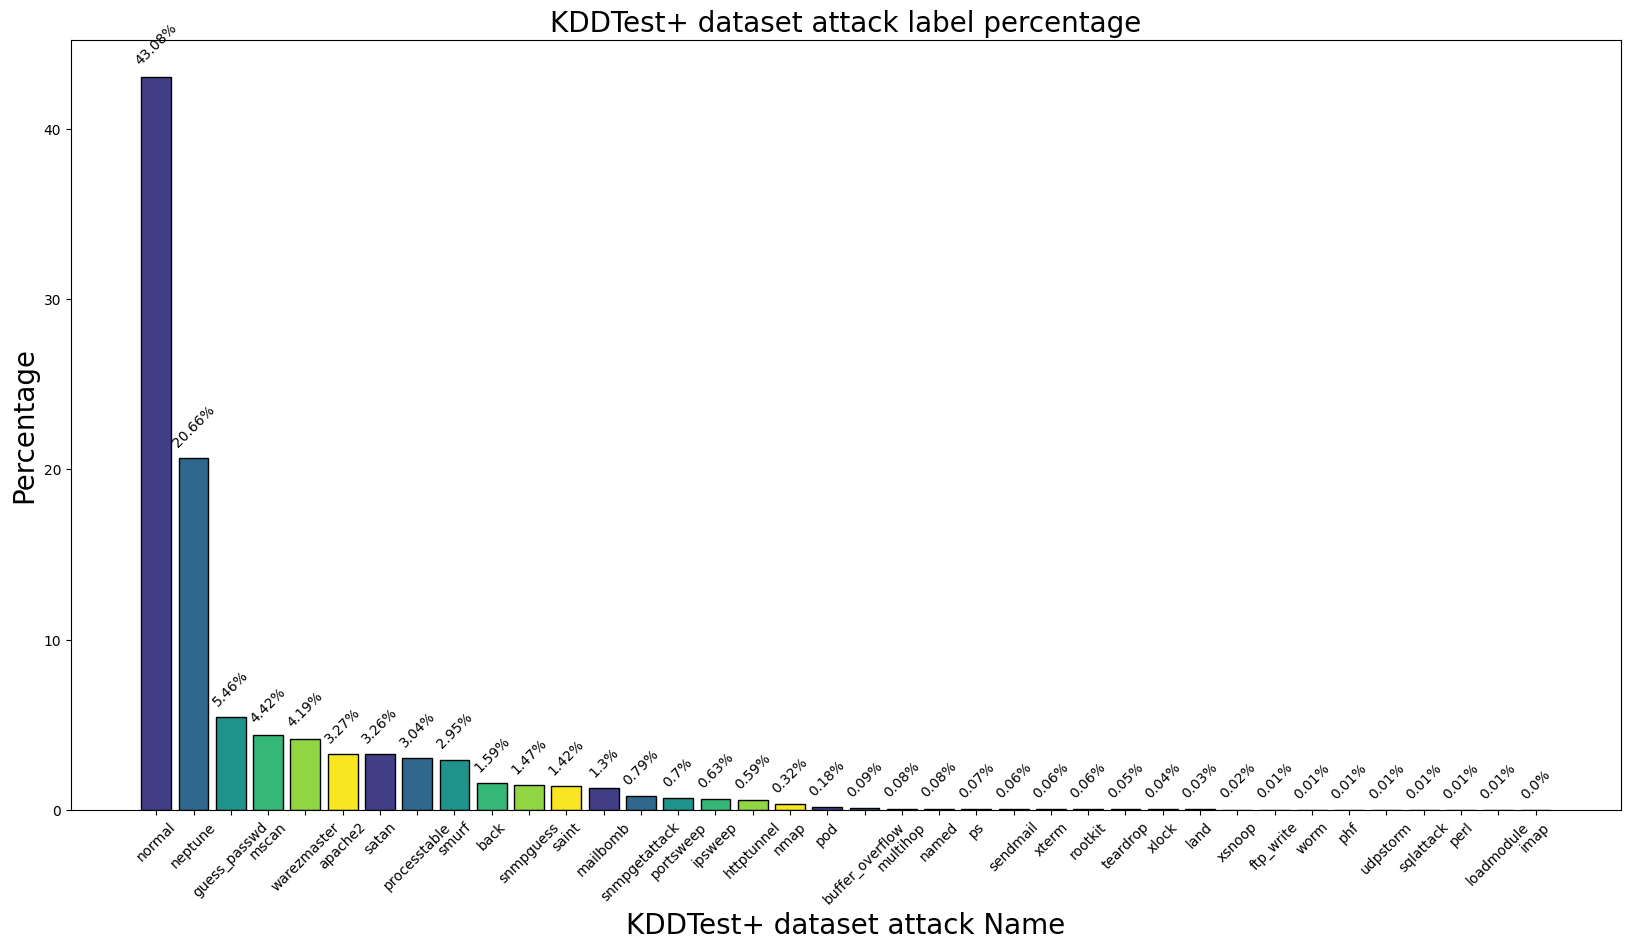

In [10]:
# 按标签分组并计算每个标签的数量
classLabel_counts = test_data.groupby(['label']).size()
# 对标签数量进行降序排序
classLabel_counts_sorted = classLabel_counts.sort_values(ascending=False)
# 计算每个类别标签的百分比
per_classLabels = classLabel_counts_sorted / test_data.shape[0] * 100
# 初始化图形
fig = plt.figure(figsize=(20, 10))
r_ = [round(each, 2) for each in per_classLabels.values]
ax = fig.add_subplot(111)
# 绘制条形图，颜色和边缘颜色已给定
ax.bar(per_classLabels.index, per_classLabels.values, color=['#413E85', '#30688D', '#1F928B', '#35B777', '#91D542', '#F8E620'], edgecolor='black')
# 设置x轴标签的旋转角度
ax.set_xticklabels(per_classLabels.index, rotation=45)
# 设置x轴和y轴的标签和标题
ax.set_xlabel("KDDTest+ dataset attack Name", fontsize=20)
ax.set_ylabel("Percentage", fontsize=20)
ax.set_title("KDDTest+ dataset attack label percentage", fontsize=20)
# 在每个条形上方添加百分比注释
for i, value in enumerate(per_classLabels.values):
    plt.annotate(f"{r_[i]}%", xy=(i, value + 0.5), ha='center', va='bottom', rotation=45) 
# 显示图形
plt.show()

In [11]:
attack_mapping = {}
with open(r'D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\attack_name',
          'r') as file:
    for line in file:
        parts = line.strip().split(' ')
        if len(parts) == 2:
            attack, category = parts
            attack_mapping[attack] = category
# 然后像之前那样使用这个映射字典
train_data['label'] = train_data['label'].map(attack_mapping)
test_data['label'] = test_data['label'].map(attack_mapping)

C:\Users\23076\AppData\Local\Temp\ipykernel_13940\3208066984.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(percent_data.index, rotation=45)


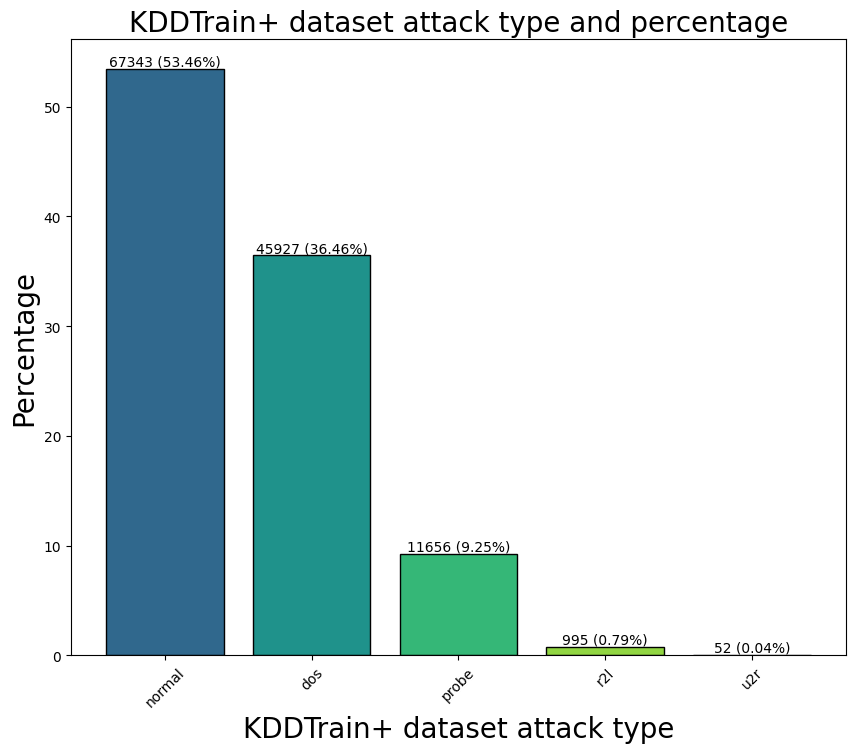

In [12]:
# 计算每个标签的百分比
percent_data = (train_data.groupby('label').size()) / train_data.shape[0] * 100
# 定义自定义排序的顺序
custom_order = ['normal', 'dos', 'probe', 'r2l', 'u2r']
# 对 percent_data 进行重新排序以匹配自定义顺序
percent_data = percent_data.loc[custom_order]
# 获取每个标签的具体数量
count_data = train_data.groupby('label').size().loc[custom_order]
# 准备绘图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
# 绘制条形图
ax.bar(percent_data.index, percent_data.values, color=['#30688D', '#1F928B', '#35B777', '#91D542', '#F8E620'], edgecolor='black')
# 设置轴标签和标题
ax.set_xticklabels(percent_data.index, rotation=45)
ax.set_xlabel("KDDTrain+ dataset attack type", fontsize=20)
ax.set_ylabel("Percentage", fontsize=20)
ax.set_title("KDDTrain+ dataset attack type and percentage", fontsize=20)
# 在每个条形上方添加百分比和具体数量
for i, (label, value) in enumerate(percent_data.items()):
    ax.annotate(f"{count_data[label]} ({value:.2f}%)", 
                xy=(i, value), ha='center', va='bottom')
# 显示图表
plt.show()

C:\Users\23076\AppData\Local\Temp\ipykernel_13940\4038442187.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(percent_data.index, rotation=45)


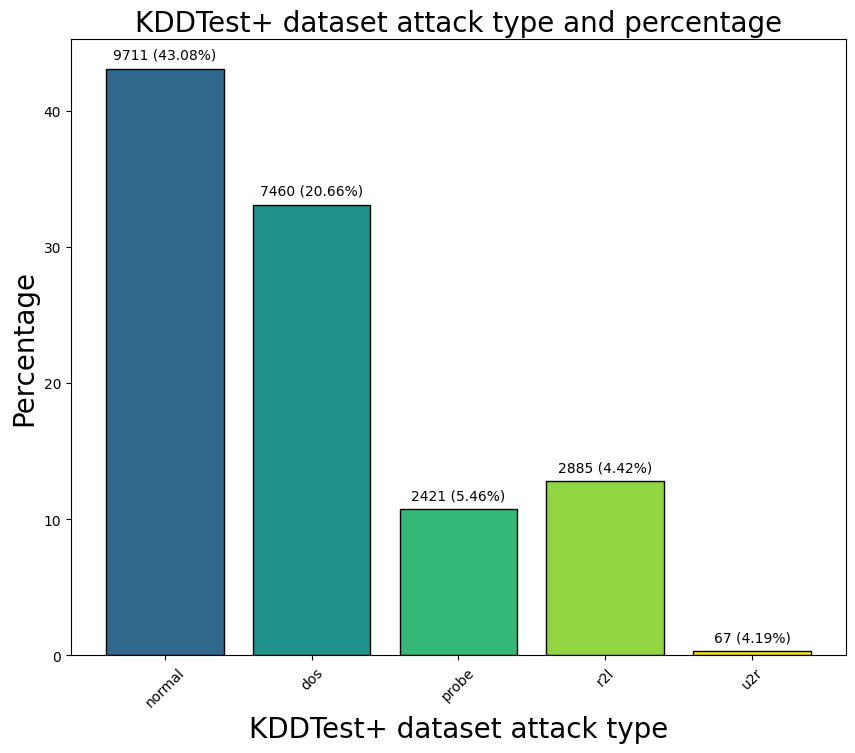

In [13]:
# 计算每个标签的百分比
percent_data = (test_data.groupby('label').size()) / test_data.shape[0] * 100
# 获取每个标签的具体数量
count_data = test_data.groupby('label').size()
# 定义自定义排序的顺序
custom_order = ['normal', 'dos', 'probe', 'r2l', 'u2r']
# 对 percent_data 进行重新排序以匹配自定义顺序
percent_data = percent_data.loc[custom_order]
count_data = count_data.loc[custom_order]
# 准备绘图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
# 绘制条形图
ax.bar(percent_data.index, percent_data.values, color=['#30688D', '#1F928B', '#35B777', '#91D542', '#F8E620'], edgecolor='black')
# 设置轴标签和标题
ax.set_xticklabels(percent_data.index, rotation=45)
ax.set_xlabel("KDDTest+ dataset attack type", fontsize=20)
ax.set_ylabel("Percentage", fontsize=20)
ax.set_title("KDDTest+ dataset attack type and percentage", fontsize=20)
# 在每个条形上方添加具体数量和百分比
for i, label in enumerate(custom_order):
    count = count_data[label]
    percentage = r_[i]
    ax.annotate(f"{count} ({percentage}%)", xy=(i, percent_data[label]+0.5), ha='center', va='bottom')
# 显示图表
plt.show()

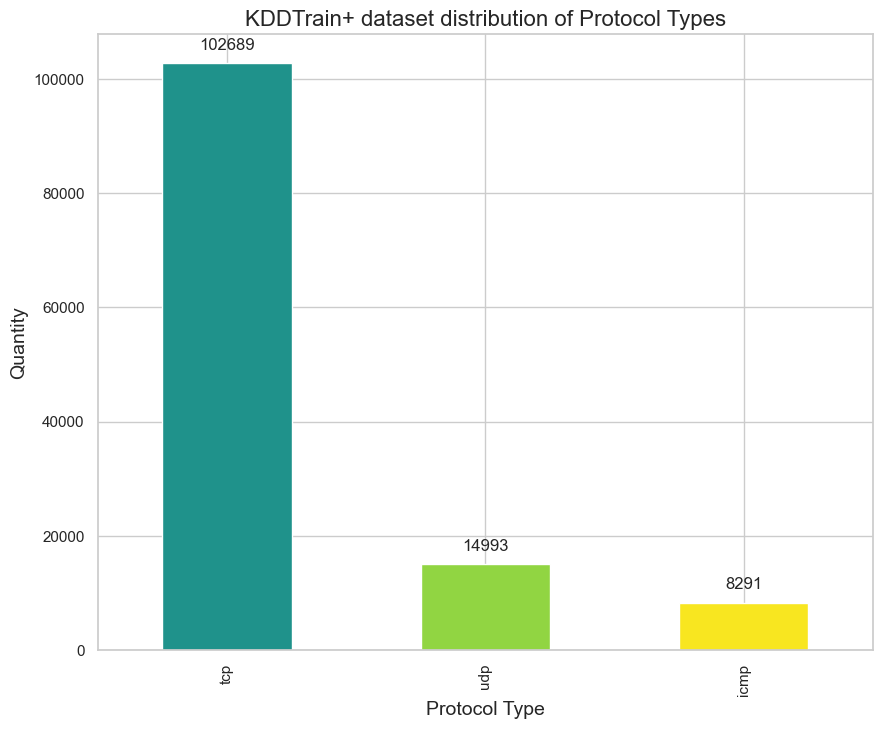

In [71]:
import matplotlib.pyplot as plt

# 计算具体的数量
value_counts = train_data['protocol_type'].value_counts(dropna=False)

# 绘制条形图
plt.subplots(figsize=(10,8))
value_counts.plot.bar(color=['#1F928B', '#91D542', '#F8E620'])

# 添加横纵标题和图表标题
plt.xlabel('Protocol Type', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.title('KDDTrain+ dataset distribution of Protocol Types', fontsize=16)

# 在每个条形上方添加数量
for index, value in enumerate(value_counts):
    plt.annotate(value, (index, value), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

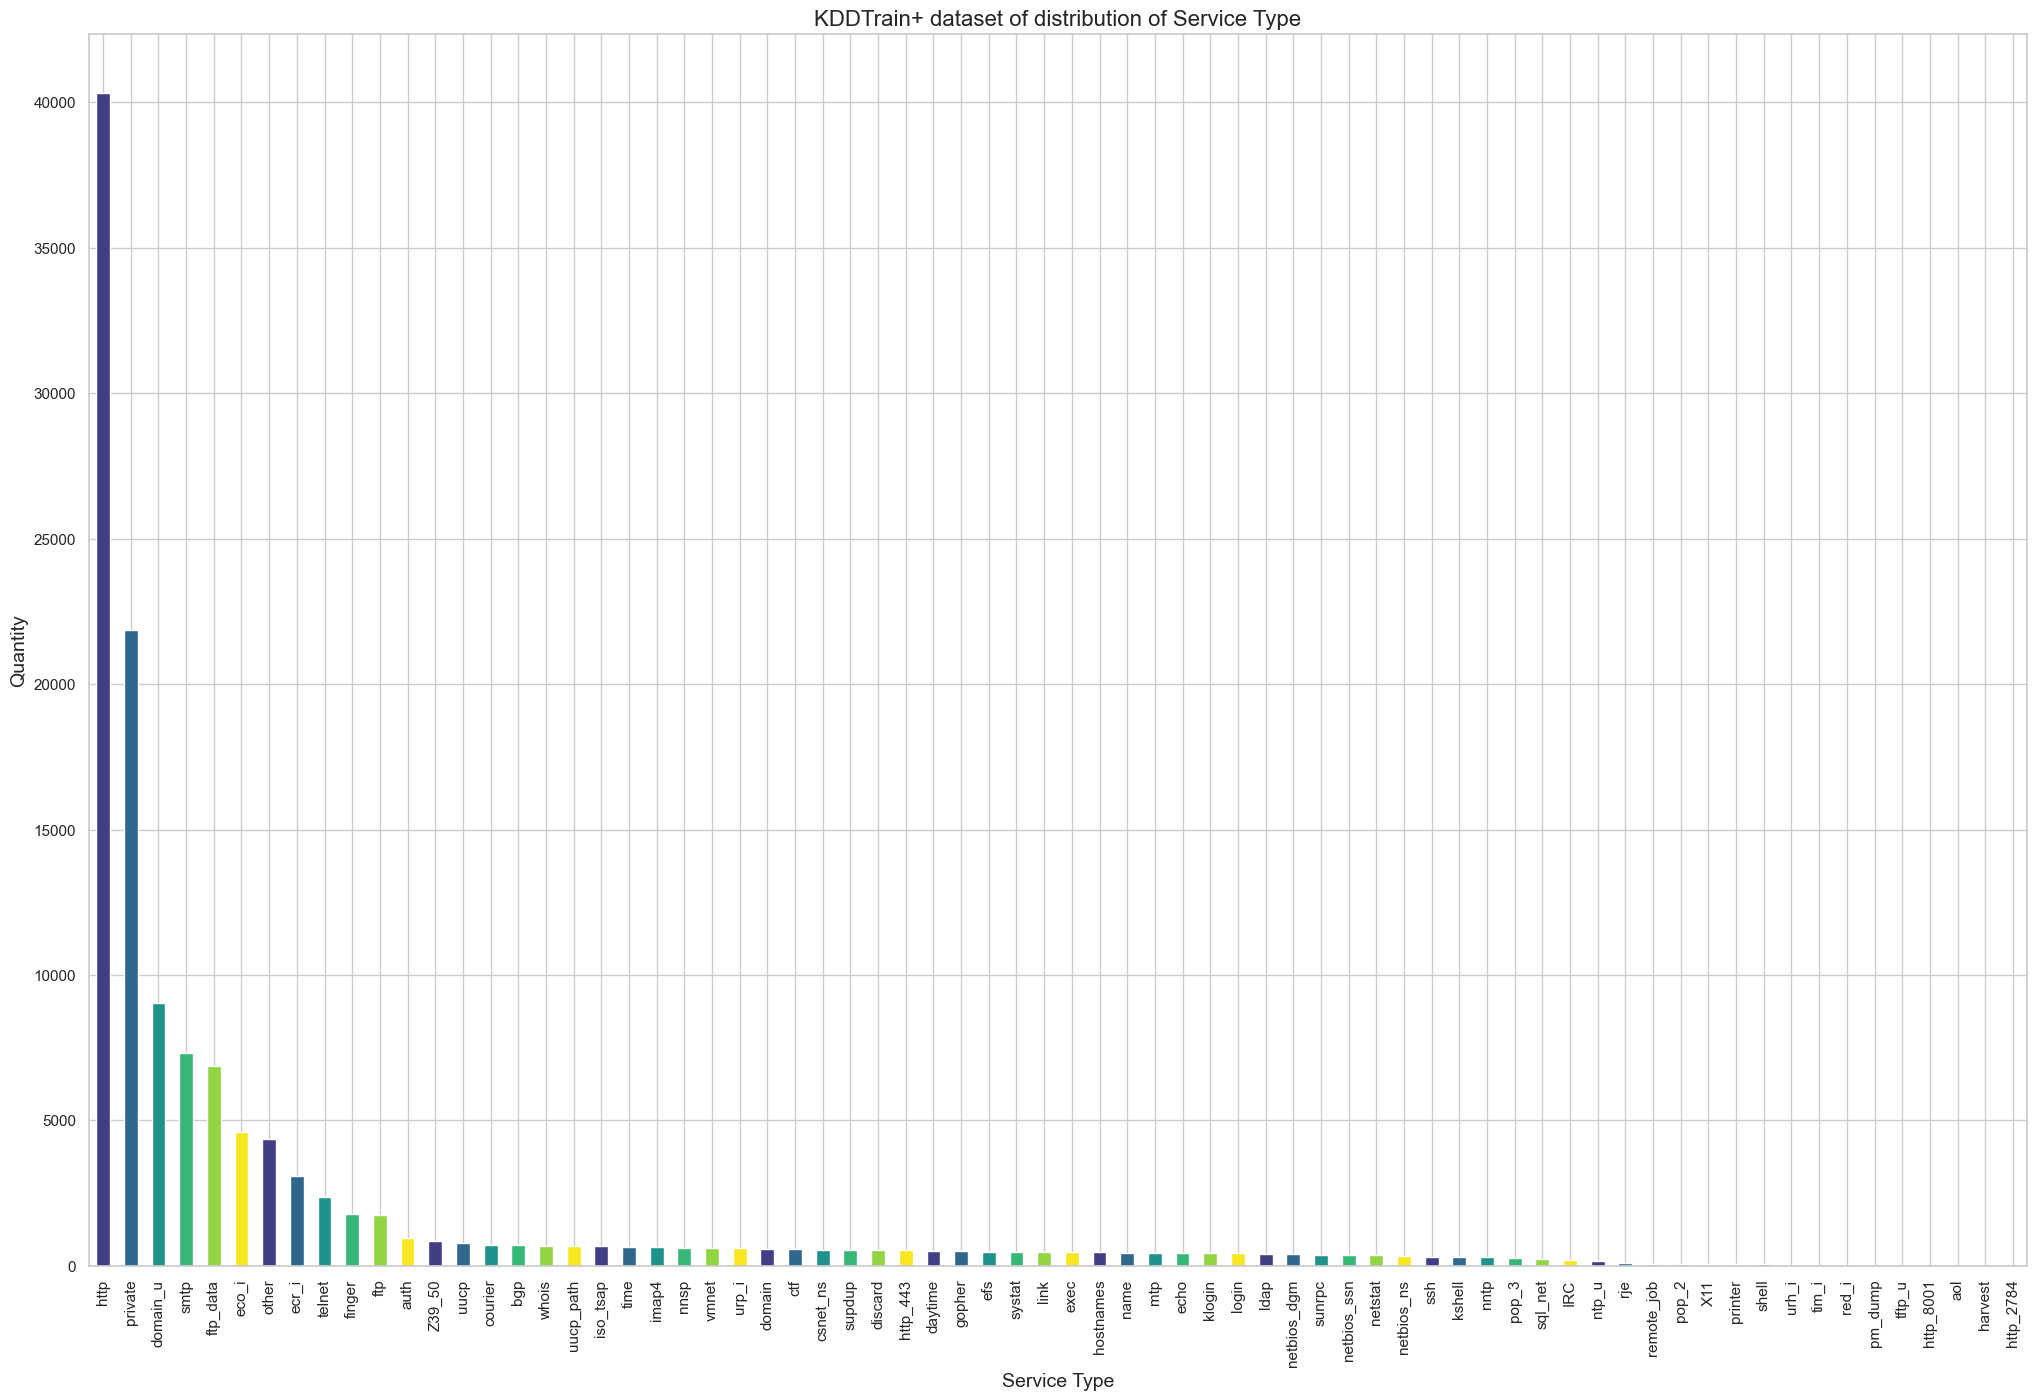

In [72]:
plt.subplots(figsize=(25,16))
train_data['service'].value_counts(normalize = True)
train_data['service'].value_counts(dropna = False).plot.bar(color=['#413E85', '#30688D', '#1F928B', '#35B777', '#91D542', '#F8E620'])
plt.xlabel('Service Type', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.title('KDDTrain+ dataset of distribution of Service Type', fontsize=16)
plt.show()

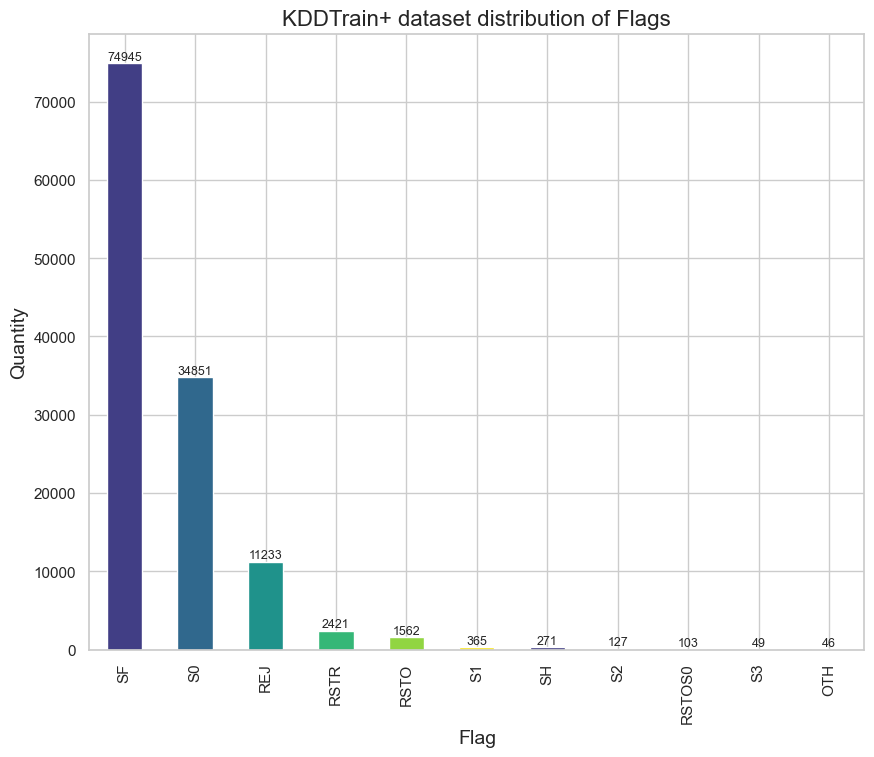

In [73]:
import matplotlib.pyplot as plt

# 绘制条形图
fig, ax = plt.subplots(figsize=(10,8))
value_counts = train_data['flag'].value_counts(dropna=False)
value_counts.plot.bar(color=['#413E85', '#30688D', '#1F928B', '#35B777', '#91D542', '#F8E620'], ax=ax)

# 添加横纵标题和图表标题
ax.set_xlabel('Flag', fontsize=14)
ax.set_ylabel('Quantity', fontsize=14)
ax.set_title('KDDTrain+ dataset distribution of Flags', fontsize=16)

# 在每个条形上方添加具体的数量
for index, value in enumerate(value_counts):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=9)
plt.show()

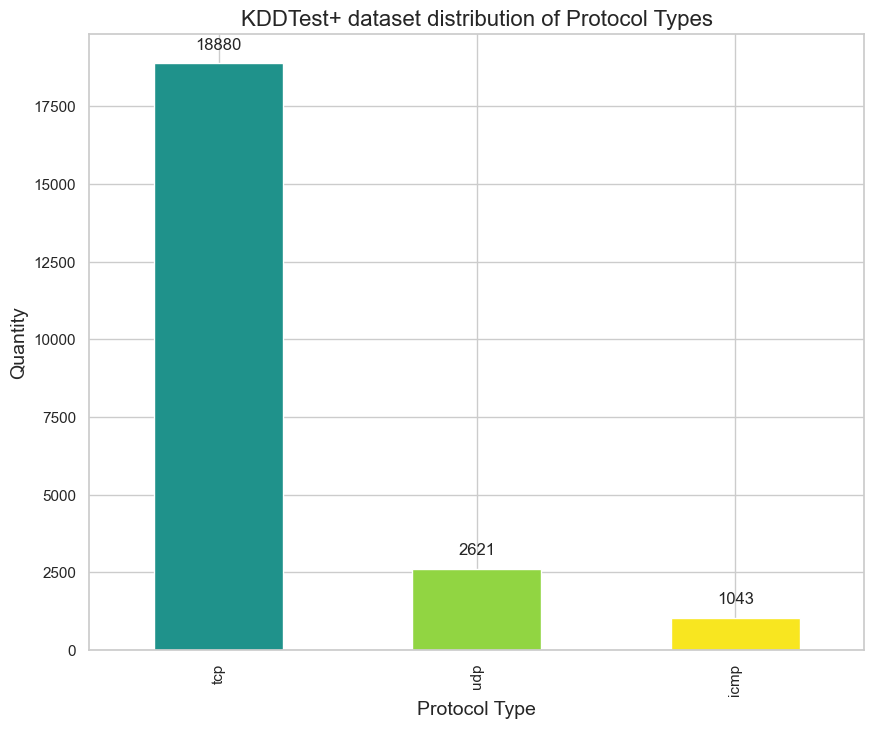

In [74]:
import matplotlib.pyplot as plt

# 计算具体的数量
value_counts = test_data['protocol_type'].value_counts(dropna=False)

# 绘制条形图
plt.subplots(figsize=(10,8))
value_counts.plot.bar(color=['#1F928B', '#91D542', '#F8E620'])

# 添加横纵标题和图表标题
plt.xlabel('Protocol Type', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.title('KDDTest+ dataset distribution of Protocol Types', fontsize=16)

# 在每个条形上方添加数量
for index, value in enumerate(value_counts):
    plt.annotate(value, (index, value), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

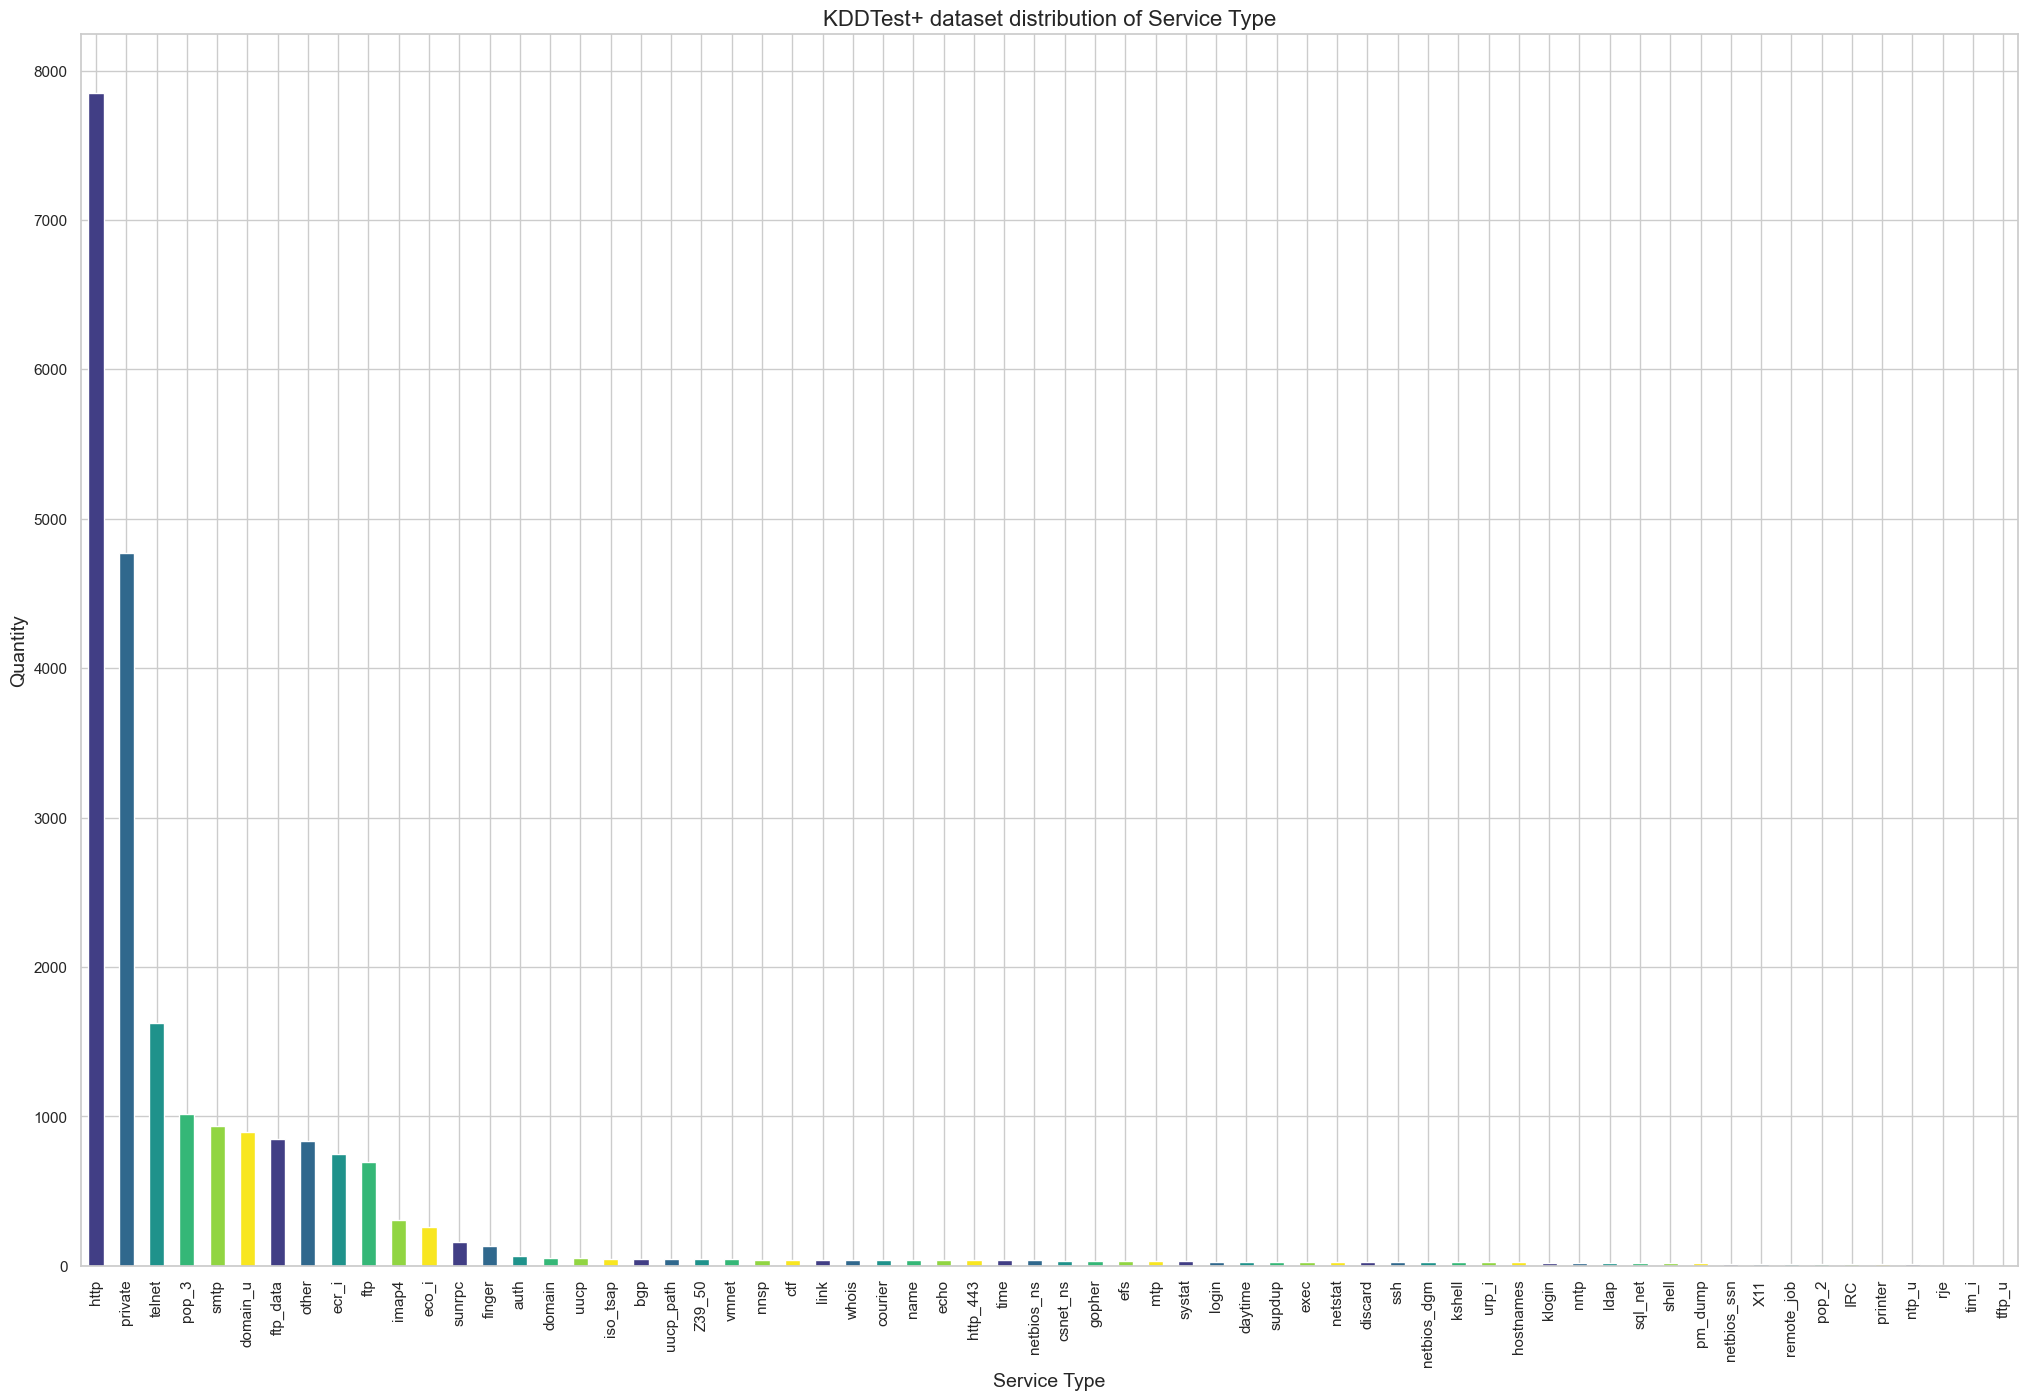

In [75]:
plt.subplots(figsize=(25,16))
test_data['service'].value_counts(normalize = True)
test_data['service'].value_counts(dropna = False).plot.bar(color=['#413E85', '#30688D', '#1F928B', '#35B777', '#91D542', '#F8E620'])
plt.xlabel('Service Type', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.title('KDDTest+ dataset distribution of Service Type', fontsize=16)
plt.show()

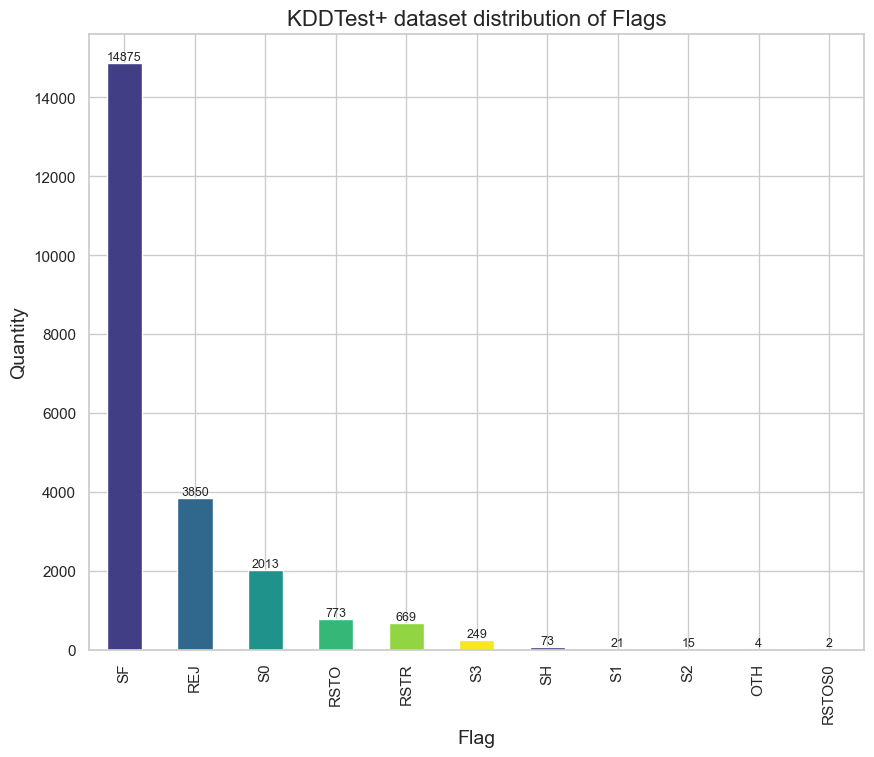

In [76]:
import matplotlib.pyplot as plt

# 绘制条形图
fig, ax = plt.subplots(figsize=(10,8))
value_counts = test_data['flag'].value_counts(dropna=False)
value_counts.plot.bar(color=['#413E85', '#30688D', '#1F928B', '#35B777', '#91D542', '#F8E620'], ax=ax)

# 添加横纵标题和图表标题
ax.set_xlabel('Flag', fontsize=14)
ax.set_ylabel('Quantity', fontsize=14)
ax.set_title('KDDTest+ dataset distribution of Flags', fontsize=16)

# 在每个条形上方添加具体的数量
for index, value in enumerate(value_counts):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=9)
plt.show()

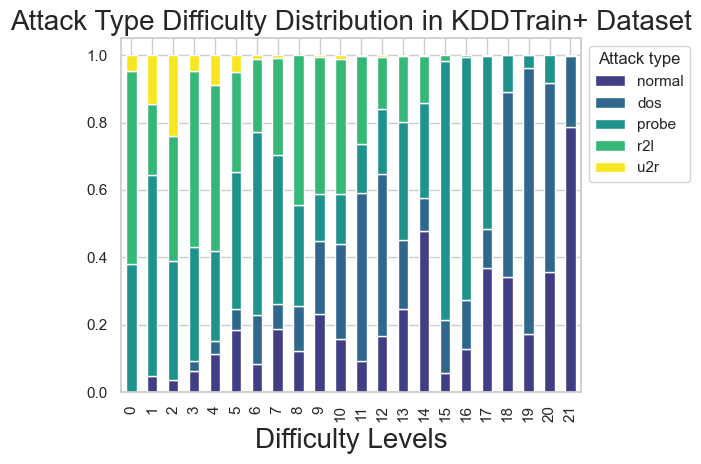

In [77]:
avg_pro = pd.crosstab(train_data['difficulty'], train_data['label'])
# 定义自定义顺序的列表
custom_order = ['normal', 'dos', 'probe', 'r2l', 'u2r']
# 确保avg_pro中只包含custom_order中的列
avg_pro = avg_pro[custom_order]
# 计算每个难度等级中，各攻击类型的比例
avg_pro_percentage = avg_pro.div(avg_pro.sum(1).astype(float), axis=0)
# 绘制堆积条形图
avg_pro_percentage.plot(kind='bar', stacked=True, color=['#413E85', '#30688D', '#1F928B', '#35B777', '#F8E620'])
# 设置图表标题和轴标签
plt.title('Attack Type Difficulty Distribution in KDDTrain+ Dataset', fontsize=20)
plt.xlabel('Difficulty Levels', fontsize=20)
# 设置图例位置到图表外部的右上角
plt.legend(title='Attack type', loc='upper left', bbox_to_anchor=(1,1))
# 调整布局以防止x轴标签被截断
plt.tight_layout()
# 显示图表
plt.show()

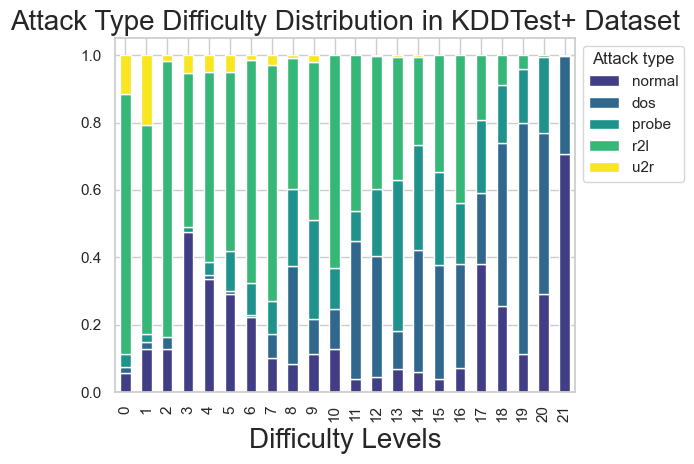

In [78]:
avg_pro = pd.crosstab(test_data['difficulty'], test_data['label'])
# 定义自定义顺序的列表
custom_order = ['normal', 'dos', 'probe', 'r2l', 'u2r']
# 确保avg_pro中只包含custom_order中的列
avg_pro = avg_pro[custom_order]
# 计算每个难度等级中，各攻击类型的比例
avg_pro_percentage = avg_pro.div(avg_pro.sum(1).astype(float), axis=0)
# 绘制堆积条形图
avg_pro_percentage.plot(kind='bar', stacked=True, color=['#413E85', '#30688D', '#1F928B', '#35B777', '#F8E620'])
# 设置图表标题和轴标签
plt.title('Attack Type Difficulty Distribution in KDDTest+ Dataset', fontsize=20)
plt.xlabel('Difficulty Levels', fontsize=20)
# 设置图例位置到图表外部的右上角
plt.legend(title='Attack type', loc='upper left', bbox_to_anchor=(1,1))
# 调整布局以防止x轴标签被截断
plt.tight_layout()
# 显示图表
plt.show()